# Wavelet Transform

The wavelet transform is a mathematical technique used to analyze signals by decomposing them into a set of wavelets at different scales. It is similar in some ways to the Fourier Transform, but it has the added advantage of being able to capture both time and frequency information.

The wavelet transform works by decomposing a signal into a series of wavelets at different scales. The scale of a wavelet refers to its frequency bandwidth, with smaller scales capturing high-frequency information and larger scales capturing low-frequency information. By decomposing a signal into wavelets at different scales, the wavelet transform can capture both the local and global features of a signal, including sharp changes and transient events.

The wavelet transform can be performed using different types of wavelets, such as the Haar wavelet, the Daubechies wavelet, or the Coiflet wavelet. Each type of wavelet has different mathematical properties, which make it more or less suitable for analyzing specific types of signals.

The wavelet transform is used in a wide range of applications, including signal processing, image compression, feature extraction, and pattern recognition.

# What's a wavelet

A wavelet is a mathematical function used in wavelet analysis to analyze signals. Wavelets are functions that can be dilated (scaled up) and translated (shifted in time) to analyze different scales and positions of a signal.

Wavelets have certain mathematical properties that make them useful in signal analysis. For example, wavelets are localized functions both in the time domain and frequency domain, which means they can provide detailed information about high-frequency features and fine details of a signal. Additionally, wavelets can have different shapes and sizes, which makes them suitable for analyzing signals with different characteristics.

There are many types of wavelets, each with different mathematical properties and suitable for different types of signals. Some examples of common wavelets are the Haar wavelet, the Daubechies wavelet, the Coiflet wavelet, and the Morlet wavelet. The choice of the appropriate wavelet depends on the type of signal being analyzed and the objectives of the analysis.

# Decomposition

During the decomposition process, a continuous signal or image is analyzed at different resolutions or scales using a series of high-pass and low-pass filters. The high-pass filters extract the high-frequency details or edges in the signal or image, while the low-pass filters extract the low-frequency components or smooth regions.

In wavelet transform, the decomposition is typically performed iteratively, with each iteration producing a new set of approximation and detail coefficients. The approximation coefficients represent the lower frequency components or the coarse approximation of the original signal or image, while the detail coefficients capture the higher frequency details at each scale.

The decomposition process allows for a multi-resolution analysis of the signal or image, providing information about its frequency content at different scales. This allows for the identification of important features, such as edges or textures, at different levels of detail.

# Reconstruction

The inverse process of wavelet transform is called "reconstruction" or "synthesis". After applying the wavelet transform and obtaining the approximation and detail coefficients, reconstruction involves combining these coefficients to obtain an approximate or complete version of the original signal or image.

In the reconstruction process, the approximation and detail coefficients from different scales are used to perform filtering operations and merge the high-frequency details and low-frequency approximations at each level of the transform. Through the inverse iteration, the detail levels are progressively merged, resulting in a refined approximation of the original signal or image.

Reconstruction in wavelet transform is a reversible process, which means that the original signal or image can be recovered with minimal loss of information if the approximation and detail coefficients are preserved.

In [46]:
import cv2
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Plotting the image

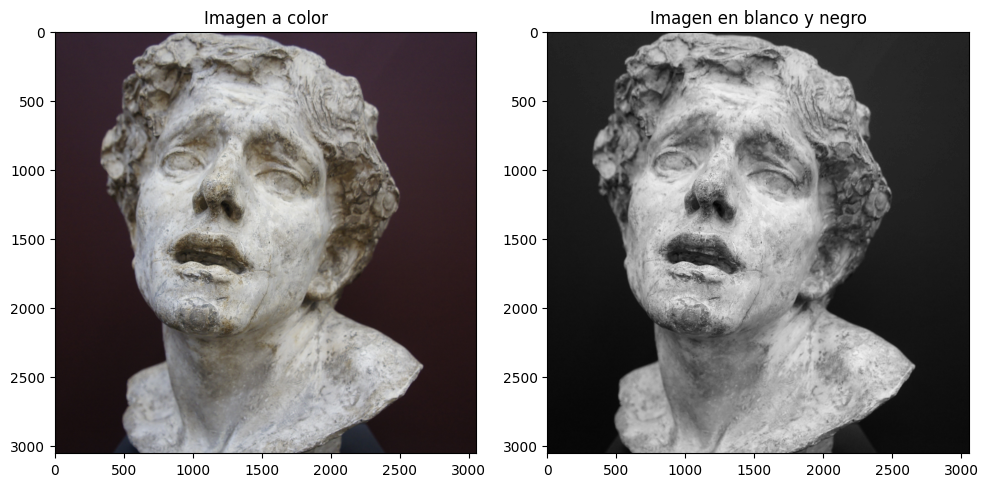

La imagen tiene un tamaño de 3056 píxeles de alto y 3056 píxeles de ancho.


In [47]:

# Cargar la imagen a color
image_color = cv2.imread('imagen.jpg')
# Cargar la imagen en escala de grises
image_gray = cv2.imread('imagen.jpg', cv2.IMREAD_GRAYSCALE)

alto1, ancho1, canales1 = image_color.shape
alto2, ancho2= image_gray.shape

# Crear una figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Mostrar la imagen a color en el primer subplot
axes[0].imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))
# axes[0].axis('off')
axes[0].set_title('Imagen a color')

# Mostrar la imagen en escala de grises en el segundo subplot
axes[1].imshow(image_gray, cmap='gray')
# axes[1].axis('off')
axes[1].set_title('Imagen en blanco y negro')

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar la figura con los dos subplots
plt.show()
print('La imagen tiene un tamaño de {} píxeles de alto y {} píxeles de ancho.'.format(alto1, ancho1))

# Resizing the image


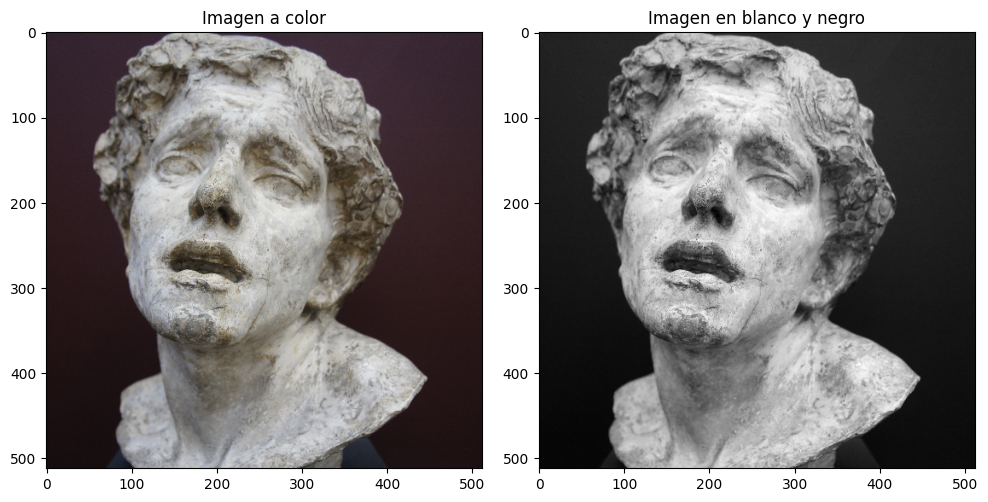

True

In [48]:
# Redimensionar la imagen a 512x512 píxeles
resized_image_color = cv2.resize(image_color, (512, 512))
resized_image_gray = cv2.resize(image_gray, (512, 512))

#Crear una figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Mostrar la imagen a color en el primer subplot
axes[0].imshow(cv2.cvtColor(resized_image_color, cv2.COLOR_BGR2RGB))
# axes[0].axis('off')
axes[0].set_title('Imagen a color')

# Mostrar la imagen en escala de grises en el segundo subplot
axes[1].imshow(resized_image_gray, cmap='gray')
# axes[1].axis('off')
axes[1].set_title('Imagen en blanco y negro')

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar la figura con los dos subplots
plt.show()
cv2.imwrite("image_color.jpg",resized_image_color)
cv2.imwrite("image_gray.jpg",resized_image_gray)

In [49]:
image = cv2.imread('/home/juanca632/PersonalProjects/stage/wavelet-transform/image_gray.jpg', cv2.IMREAD_GRAYSCALE)


# Haar Wavelet

The Haar wavelet is the simplest and most widely used wavelet in wavelet analysis.

The Haar wavelet is defined by two functions: the mother wavelet and the father wavelet. The mother wavelet is a simple step function that begins at zero, rises to one over the first half of its interval, and then drops back to zero over the second half. The father wavelet is a scaled and shifted version of the mother wavelet.

The Haar wavelet is useful for analyzing signals with sharp transitions or discontinuities, such as digital signals or piecewise-constant signals. It is particularly useful in image processing, where it can be used for tasks such as edge detection, image compression, and denoising.

One advantage of the Haar wavelet is its computational simplicity, which makes it fast and efficient for use in real-time applications. However, its simple shape also means that it may not be as effective as other wavelets for analyzing signals with complex features or high-frequency content.

## Decomposition


In [50]:
scales = 3

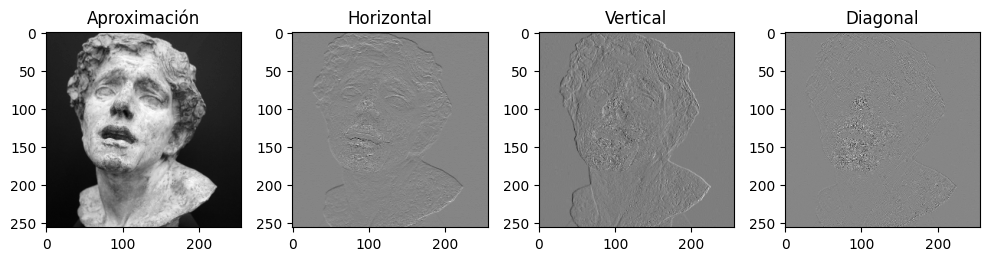

In [51]:
# Realizar la transformada wavelet de Haar 2D
coeffs = pywt.dwt2(image, 'haar')

# Extraer los coeficientes de aproximación (low-frequency) y detalles (high-frequency)
cA, (cH, cV, cD) = coeffs

# Visualizar los resultados
fig, axes = plt.subplots(1, 4, figsize=(10, 10))
axes[0].imshow(cA, cmap='gray')
axes[0].set_title('Aproximación')
axes[1].imshow(cH, cmap='gray')
axes[1].set_title('Horizontal')
axes[2].imshow(cV, cmap='gray')
axes[2].set_title('Vertical')
axes[3].imshow(cD, cmap='gray')
axes[3].set_title('Diagonal')
plt.tight_layout()
plt.show()

4


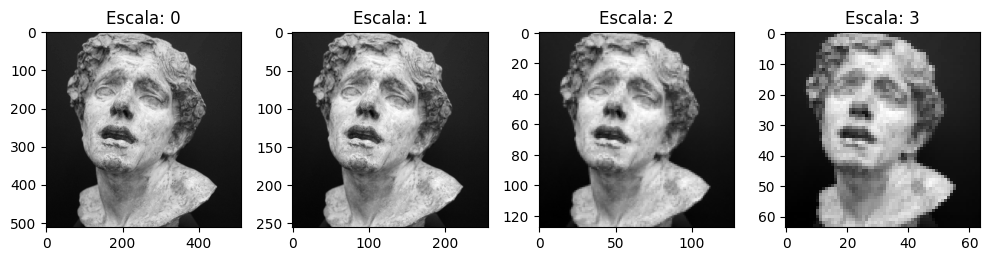

In [52]:

def haar_wavelet_transform(image, scales):
    coeffs = []
    for i in range(scales):
        image, cD = pywt.dwt2(image, 'haar')
        coeffs.append(cD)
        axes[i+1].imshow(image, cmap='gray')
        axes[i+1].set_title('Escala: {}'.format(i+1))
        
    coeffs.append(image)
    coeffs.reverse()
    return coeffs

# Aplicar la transformada wavelet de Haar con N escalas
fig, axes = plt.subplots(1, scales+1, figsize=(10, 10))

axes[0].imshow(image, cmap='gray')
axes[0].set_title('Escala: 0')

coeffs = haar_wavelet_transform(image, scales)
print(len(coeffs))
# Visualizar los coeficientes de la transformada
plt.tight_layout()
plt.show()


## Reconstruction


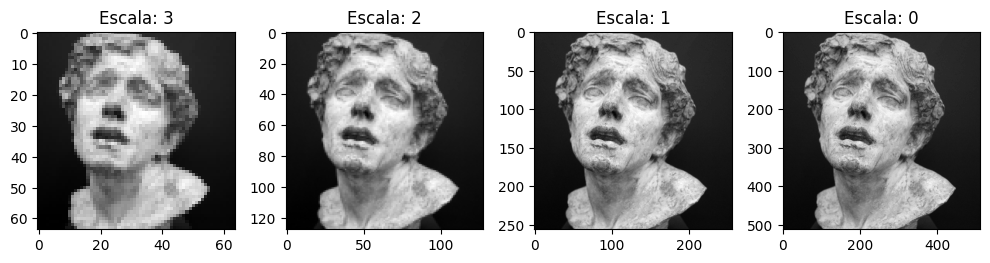

In [53]:
def haar_wavelet_reconstruction(coeffs):
    image = coeffs[0]
    for i in range(1, len(coeffs)):
        image = pywt.idwt2((image, coeffs[i]), 'haar')
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title('Escala: {}'.format(len(coeffs)-(i+1)))
    return image

# Coeficientes de la transformada wavelet
# coeffs = [...]

# Realizar la reconstrucción de la imagen
fig, axes = plt.subplots(1, scales+1, figsize=(10, 10))

axes[0].imshow(coeffs[0], cmap='gray')
axes[0].set_title('Escala: {}'.format(scales))

reconstructed_image = haar_wavelet_reconstruction(coeffs)

# Visualizar la imagen reconstruida
plt.tight_layout()
plt.show()


# Daubechies Wavelet

The Daubechies wavelet transform is a type of discrete wavelet transform that uses wavelets defined by mathematician Ingrid Daubechies. These wavelets are widely used in signal processing and image compression due to their desirable properties, such as orthogonality, compact support, and good localization in both time and frequency domains.

The Daubechies wavelet transform is applied to discrete-time signals by decomposing the signal into different frequency subbands or scales. This decomposition is achieved by convolving the signal with a set of wavelet filters, typically referred to as the "scaling" and "wavelet" filters. The process involves a series of low-pass and high-pass filtering, followed by downsampling (decimation) to reduce the data size.

The Daubechies wavelet transform allows for multi-resolution analysis, where the signal can be represented at different scales or levels of detail. The transform provides both approximation coefficients (representing low-frequency components) and detail coefficients (representing high-frequency components) at each level of decomposition.

## Decomposition

In [54]:
db = 'db2'
scales = 3

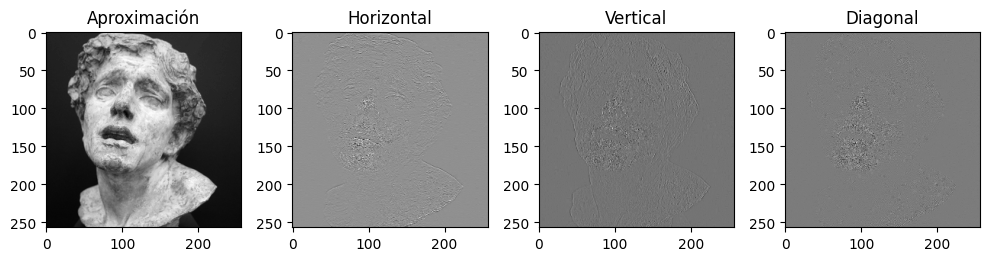

In [55]:


# Realizar la transformada wavelet de Haar 2D
coeffs = pywt.dwt2(image, db)

# Extraer los coeficientes de aproximación (low-frequency) y detalles (high-frequency)
cA, (cH, cV, cD) = coeffs

# Visualizar los resultados
fig, axes = plt.subplots(1, 4, figsize=(10, 10))
axes[0].imshow(cA, cmap='gray')
axes[0].set_title('Aproximación')
axes[1].imshow(cH, cmap='gray')
axes[1].set_title('Horizontal')
axes[2].imshow(cV, cmap='gray')
axes[2].set_title('Vertical')
axes[3].imshow(cD, cmap='gray')
axes[3].set_title('Diagonal')
plt.tight_layout()
plt.show()

4


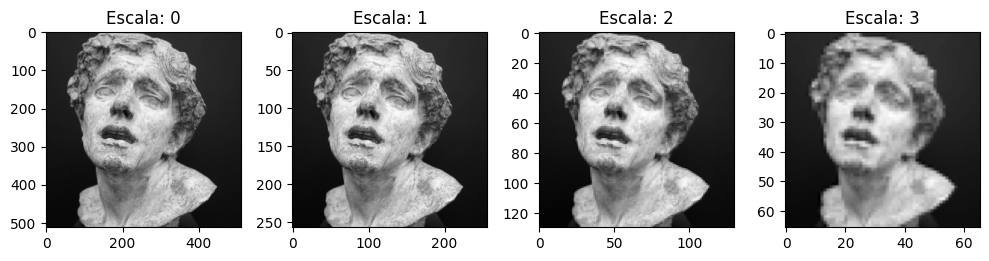

In [56]:

def haar_wavelet_transform(image, scales):
    coeffs = []
    for i in range(scales):
        image, cD = pywt.dwt2(image, db)
        coeffs.append(cD)
        axes[i+1].imshow(image, cmap='gray')
        axes[i+1].set_title('Escala: {}'.format(i+1))
        
    coeffs.append(image)
    coeffs.reverse()
    return coeffs

# Aplicar la transformada wavelet de Haar con N escalas
fig, axes = plt.subplots(1, scales+1, figsize=(10, 10))

axes[0].imshow(image, cmap='gray')
axes[0].set_title('Escala: 0')

coeffs = haar_wavelet_transform(image, scales)
print(len(coeffs))
# Visualizar los coeficientes de la transformada
plt.tight_layout()
plt.show()

## Reconstruction

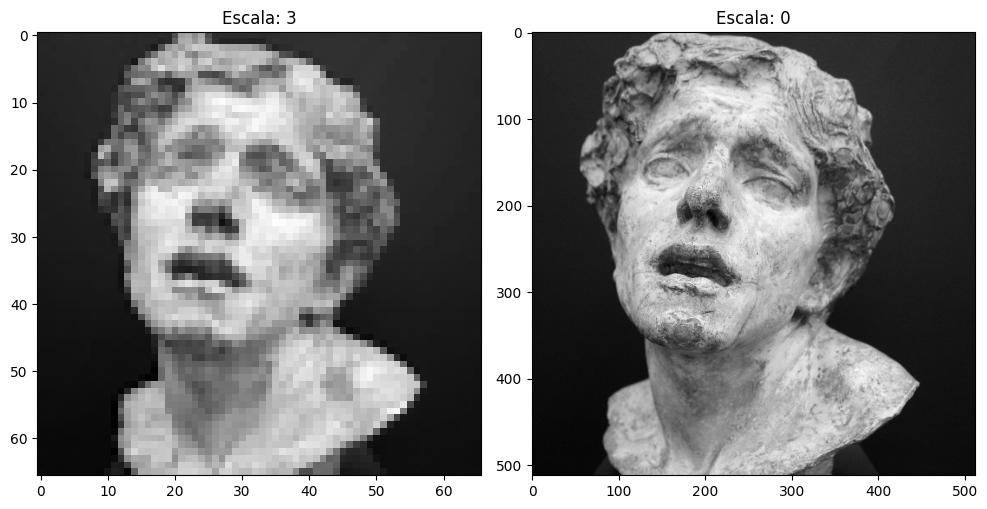

In [57]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

def haar_wavelet_reconstruction(coeffs):
    image = pywt.waverec2(coeffs, db)
    return image

# Coeficientes de la transformada wavelet
# coeffs = [...]

# Realizar la reconstrucción de la imagen
scales = len(coeffs) - 1
fig, axes = plt.subplots(1, 2, figsize=(10, 10))
axes[0].imshow(coeffs[0], cmap='gray')
axes[0].set_title('Escala: {}'.format(scales))
reconstructed_image = haar_wavelet_reconstruction(coeffs)

# Visualizar la imagen reconstruida
axes[1].imshow(reconstructed_image, cmap='gray')
axes[1].set_title('Escala: 0')
plt.tight_layout()
plt.show()


# Meyer's system

The "Meyer's System" refers to a specific wavelet function used in wavelet transform. Wavelet transform is a mathematical technique that allows analyzing signals or images at different scales of frequency and time.

The wavelet system proposed by Meyer utilizes a wavelet function called "Meyer wavelet" or "Meyer-Morlet wavelet." This wavelet function is characterized by having compact support in the time domain and variable bandwidth in the frequency domain.

The Meyer wavelet function is designed to capture fine details in signals or images while preserving important features at different scales. It is particularly useful for analyzing signals or images that have variable frequency components or discontinuities.

## Decomposition

In [58]:
scales = 3

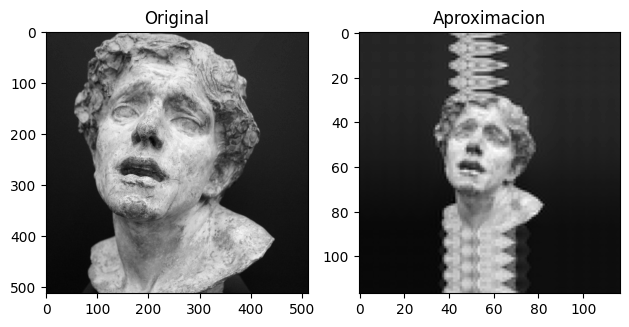

In [59]:

def meyer_wavelet_transform(image, scales):
    coeffs = pywt.wavedec2(image, 'dmey', level=scales)
    return coeffs

coefficients = meyer_wavelet_transform(image, scales)


# Mostrar la imagen original y la imagen reconstruida
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original')

plt.subplot(1, 2, 2)
plt.imshow(coefficients[0], cmap='gray')
plt.title('Aproximacion')

plt.tight_layout()
plt.show()


# Reconstruction

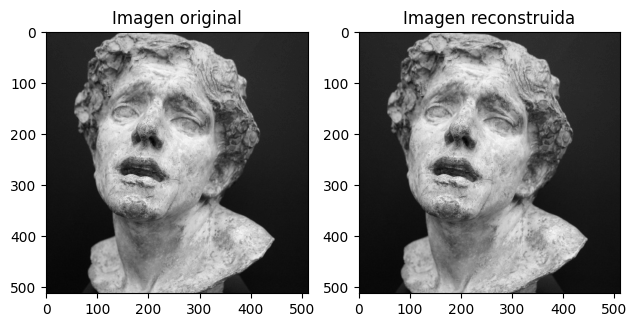

In [60]:
def meyer_wavelet_inverse_transform(coeffs):
    image = pywt.waverec2(coeffs, 'dmey')
    return image

# Realizar la transformada inversa para obtener la imagen reconstruida
reconstructed_image = meyer_wavelet_inverse_transform(coefficients)

# Mostrar la imagen original y la imagen reconstruida
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen original')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Imagen reconstruida')

plt.tight_layout()
plt.show()
